# 군집 (Clustering)

군집이란 비슷한 샘플을 구별해 하나의 cluster 또는 비슷한 샘플의 그룹으로 할당하는 작업을 의미한다. 유명한 군집 알고리즘으로는 k-평균 (k-Means)와 DBSCAN이 있다.

군집은 다음과 같은 애플리케이션에 사용될 수 있다.

#### 고객 분류
고객을 구매 이력이나 웹사이트 내 행동 기반으로 클러스터링

#### 데이터 분석
데이터셋 분석 시, 군집을 수행하고, 클러스터를 따로 분석

#### 차원 축소 기법
데이터셋에 군집을 수행하면, 각 클러스터에 대한 샘플의 친화성(affinity)를 측정할 수 있다. k개의 클러스터가 있고 각각을 k차원의 특성 벡터로 본다면, 원본 특성 벡터보다 훨씬 저차원으로 만들 수 있다.

#### 이상치 탐지
데이터셋에 군집을 수행하고, 모든 클러스터에 친화성이 낮은 샘플은 이상치로 볼 수 있다. 이상치 탐지는 제조 라인의 결함 감지나 부정거래감시(fraud detection)에 활용된다.

#### 준지도 학습
데이터셋에 군집을 수행하고, 동일한 클러스터의 샘플에 레이블을 전파할 수 있다. 이는 지도학습에 필요한 레이블을 크게 증가시킬 수 있다.

#### 검색 엔진
비슷한 이미지를 찾는 검색엔진의 경우, 데이터 베이스에 있는 모든 이미지에 군집 알고리즘을 적용한다. 그리고 사용자가 찾으려는 이미지를 제공하면, 이 이미지가 어느 클러스터에 해당하는지 찾고, 찾은 클러스터의 모든 이미지를 반환한다.

#### Image Segmentation
색을 기반으로 픽셀에 군집을 수행한다. 그리고 각 픽셀의 색을 해당 클러스터의 평균색으로 바꾼다. 이는 이미지의 색상 종류를 크게 줄여주고, 물체의 윤곽을 감지하기 쉽게 해주므로, object detection and tracking에서 많이 활용된다.

## k-평균 (k-Means)

k-평균(K-Means) 알고리즘은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다.

다음은 사이킷런의 `KMeans`를 사용해 k-평균을 알고리즘을 할당하는 예이다.

In [1]:
# Dataset 생성

import numpy as np
from sklearn.datasets import make_blobs

blob_centers = np.array([[0.2, 2.3],
                         [-1.5, 2.3],
                         [-2.8, 1.8],
                         [-2.8, 2.8],
                         [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [2]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

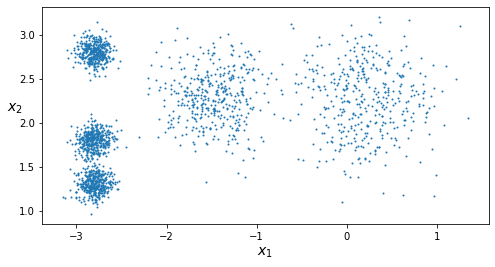

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [4]:
# k-Means 

from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

군집에서 알고리즘이 샘플에 할당한 클러스터의 인덱스를 레이블(label, 지도학습에서의 label이랑은 다름)이라고 한다.

`KMeans`에서는 `labels_` 인스턴스 변수로 확인할 수 있다.

In [5]:
print(y_pred)
print(kmeans.labels_)

[1 4 0 ... 3 0 4]
[1 4 0 ... 3 0 4]


알고리즘이 찾은 센트로이드(centroid)는 `cluster_centers_` 인스턴스 변수로 확인할 수 있다.

In [6]:
print(kmeans.cluster_centers_)

[[ 0.20876306  2.25551336]
 [-2.80037642  1.30082566]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]
 [-2.80389616  1.80117999]]


새로운 샘플의 가장 가까운 centroid 클러스터는 다음과 같이 확인할 수 있다.

In [7]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.predict(X_new))

[0 0 3 3]


클러스터들의 결정경계를 그려보면 다음과 같은 보로노이 다이어그램을 얻을 수 있다.

보로노이 다이어그램(Voronoi diagram)은 평면을 특정 점까지의 거리가 가장 가까운 점의 집합으로 분할한 그림을 의미한다.

In [8]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


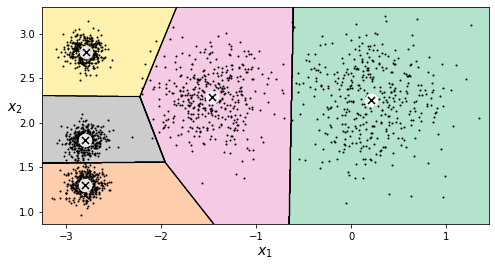

In [9]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### 하드 군집 (Hard Clustering)
샘플을 하나의 클러스터에 할당하는 방식

### 소프트 군집 (Soft Clustering)
클러스터마다 샘플에 점수를 부여하는 방식, 여기서 점수는 샘플과 센트로이드 사이의 거리나 가우시안 방사 기저 함수와 같은 유사도 점수(similarity score)가 될 수 있다.

`KMeans`에서는 다음과 같이 `transform()`을 통해 샘플과 각 센트로이드 사이의 거리를 반환할 수 있다.

In [10]:
print(kmeans.transform(X_new))

[[0.32995317 2.88633901 1.49439034 2.9042344  2.81093633]
 [2.80290755 5.84236351 4.4759332  5.84739223 5.80730058]
 [3.29399768 1.71086031 1.69136631 0.29040966 1.21475352]
 [3.21806371 1.21567622 1.54808703 0.36159148 0.72581411]]


위와 같이 고차원 데이터셋을 k-차원 데이터셋으로 변환하면, 효율적인 비선형 차원 축소 기법이 될 수 있다.

### k-평균 알고리즘

k-평균 알고리즘의 동작은 다음과 같다.
1. 센트로이드를 무작위로 초기화한다.
2. 다음 샘플에 레이블을 할당하고 센트로이드를 업데이트한다.
3. 2의 과정을 센트로이드에 변화가 없을 때까지 계속해서 반복한다.

다음 그림은 위 과정을 나타낸 것이다.

<img src="./images/k-means_algorithm.png" alt="k-means_algorithm">

위 그림은 왼쪽 위, 오른쪽 위, 왼쪽 중간, ... 의 순서이며, 왼쪽 그림들은 센트로이드 업데이트(처음에는 초기화)를 나타내고, 오른쪽 그림들은 샘플에 레이블을 할당하는 과정을 나타낸다.

k-평균 알고리즘은 가장 빠른 군집 알고리즘 중 하나이며, 위 그림에서도 3번만에 수렴한 것을 알 수 있다.

### 센트로이드 초기화 방법

k-평균 알고리즘의 수렴은 보장되지만, 다음과 같이 센트로이드의 랜덤한 초기화 때문에 최적의 솔루션으로 수렴하지 못하는 경우도 있다.

<img src="./images/non_optimal_solution.png" alt="non_optimal_solution">

이를 방지하기 위한 방법은 2가지가 있다.


#### 1. 초기화를 직접 지정하는 방법

센트로이드 위치를 근사하게 안다면, 직접 지정해서 초기화하는 방법이 있다. 다음은 `init`과 `n_init`을 통해 지정하는 방법이다.

In [11]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

#### 2. 여러 번 수행 후, 좋은 솔루션을 선택하는 방법

랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고, 가장 좋은 솔루션을 선택하는 방법이다. 최선의 솔루션을 찾기 위한 성능 지표는 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리인 inertia가 있다.

다음은 사이킷런에서 `n_init`을 통해 랜덤 초기화 횟수를 지정하고, 가장 좋은 솔루션의 inertia를 `inertia_`로 확인하는 예제이다.

In [12]:
kmeans = KMeans(n_clusters=5, n_init=20)
y_pred = kmeans.fit_predict(X)

print(kmeans.inertia_)

# score()는 intertia의 음수 값을 반환한다.
print(kmeans.score(X))

211.5985372581684
-211.59853725816856


### k-평균++ 알고리즘

2006년 David Arthur와 Sergei Vassilvitskii의 논문에서 k-평균 알고리즘을 향상시킨 k-평균++ 알고리즘이 제안되었다.

다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계를 사용하여, 최적이 아닌 솔루션으로 수렴할 가능성을 크게 줄여주며 솔루션을 찾기 위한 알고리즘 반복 실행 횟수를 크게 줄여준다.

사이킷런의 `KMeans`는 기본적으로 이 초기화 방법을 사용한다.

### k-평균 속도 개선

2013년 Charles Elkan의 논문에서 k-평균 알고리즘의 불필요한 거리 계산을 피함으로서 알고리즘의 속도를 상딩히 높이는 방법이 제안되었다.

이를 위해 삼각 부등식을 사용하고(두 점 사이의 직선은 항상 짧은 거리가 됨), 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지한다.

사이킷런의 `KMeans`에서 기본적으로 이 방법을 사용한다.

### 미니 배치 k-평균

2010년 David Scully의 논문에서 k-평균 알고리즘에 전체 데이터셋을 사용하지 않고 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동하는 방법이 제안되었다.

이는 알고리즘의 속도를 3배에서 4배정도 향상시켜 주었고, 대량의 데이터셋에 적용할 수 있게 해주었다.

사이킷런에서는 `MiniBatchKMeans`를 사용해 이를 수행할 수 있다.

In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

### 최적의 클러스터 개수 찾기

올바른 클러스터 개수를 k를 설정하는 것은 쉽지 않다. 

다음은 지금까지 사용한 예제 데이터에 각각 k=3, k=8로 지정하여 수행한 그래프이다.

In [14]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

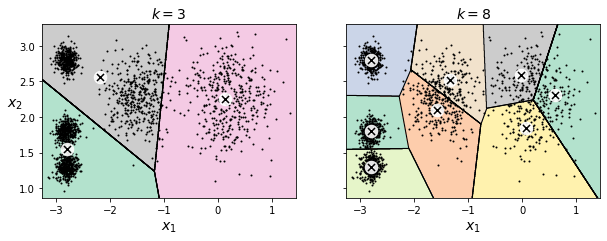

In [15]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

최적의 클러스터 개수 찾기를 찾기 위해 가장 작은 inertia를 가진 모델을 선택하는 것은 좋지 않다. 그 이유는 아래의 그래프와 같이 inertia는 k가 증가함에 따라 점점 작아지기 때문이다.

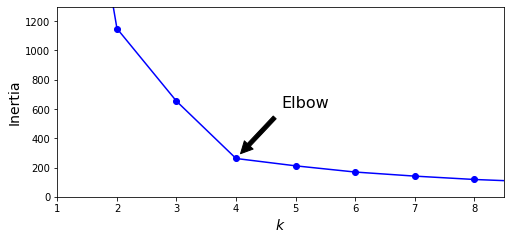

In [16]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

위 그림에서, 줄어드는 정도가 느려지는 지점을 Elbow라고 한다.(k=4지점)

### 실루엣 점수 (Silhouette Score)

더 정확히 최선의 클러스터 개수를 선택하기 위한 방법은 실루엣 점수를 사용하는 것이다. 실루엣 점수는 모든 샘플에 대한 실루엣 계수(silhouette coefficient)의 평균을 의미한다.

샘플의 실루엣 계수는 $(b-a)/max(a, b)$로 계산한다.
- $a$ : 동일한 클러스터에 있는 다른 샘플 까지의 평균 거리
- $b$ : 가장 가까운 클러스터까지 평균 거리

실루엣 계수는 -1에서+1의 값을 가진다.
- +1에 가까우면 자신의 클러스터 안에 잘 속해있고, 다른 클러스터와 멀리 떨어져 있다는 의미이다.
- 0에 가까우면 클러스터의 경계에 위치한다는 의미이다.
- -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다는 의미이다.

사이킷런의 `silhouette_score()`를 사용하면, 실루엣 점수를 계산할 수 있다.

In [17]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.655517642572828


클러스터 개수에 따른 실루엣 점수 그래프를 그려보면 다음과 같다.

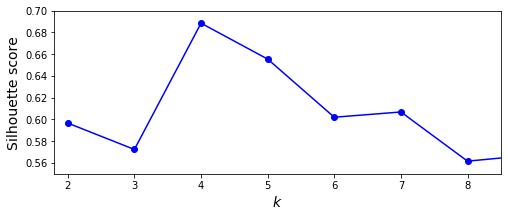

In [18]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

위 그래프에서, k=4가 가장 좋고, k=5도 꽤나 좋다는 사실을 확인할 수 있다.

### 실루엣 다이어그램 (Silhouette Diagram)

모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬한 그래프를 실루엣 다이어그램이라고 한다.

이 그래프의 높이는 클러스터가 포함한 샘플의 개수이며, 너비는 실루엣 계수를 나타낸다.(즉, 넓을수록 좋음)

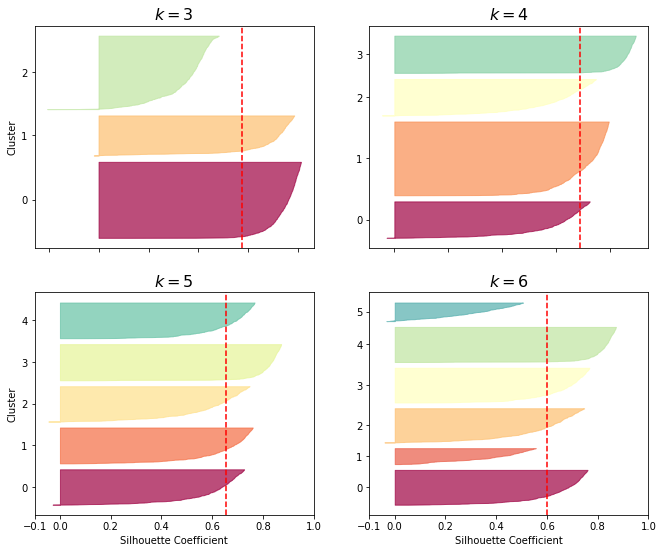

In [19]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

위 그림에서, 수직 파선은 클러스터 개수에 해당하는 실루엣 점수를 나타낸다. 

k=3과 k=6에서는 몇개의 클러스터가 이보다 낮은 계수를 가지므로, 클러스터의 샘플이 다른 클러스터와 가까우며 좋지 못하다는 것을 알 수 있다.

k=4일때의 전반적인 실루엣 점수는 k=5보다 높지만, k=5에서는 비슷한 크기의 클러스터를 고르게 가지므로 가장 좋은 선택이 된다.

## k-평균의 한계

k-평균은 다음과 같은 한계가 있다.
- 최적의 솔루션을 찾기 위해 알고리즘을 여러번 수행해야 한다.
- 클러스터 개수를 지정해야 한다.
- 클러스터의 크기나 밀집도가 서로 다르거나, spherical이 아닐 경우 잘 동작하지 않는다.

다음은 위의 세번째 경우를 보여준다. (3개의 타원형 클러스터를 적절히 구분하지 못함)

<img src="./images/limits_of_k-means.png" alt="limits_of_k-means">

따라서, k-평균을 실행하기 전에 입력 feature의 scaling을 맞춰주는 것이 도움이 된다.

참고로 위와 같은 타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동한다.

## 군집을 사용한 Image Segmentation

### Image Segmentation
이미지를 여러 개의 segment로 분할하는 작업을 의미한다. Image segmentation은 다음과 같은 여러 방법들이 있다.

#### Semantic segmenation
Same object type의 픽셀을 같은 segment로 할당한다.

#### Instance segmentation
Same individual object의 픽셀을 같은 segment로 할당한다. 보행자 분할이 semantic segmentation이라면, 각각의 보행자를 분할하는 작업이 instance segmentation이라고 볼 수 있다.

#### Color segmentation
Similar color의 픽셀을 같은 segment로 할당한다.

다음은 `KMeans`를 이용해 간단한 color segmentation을 수행하는 예이다.

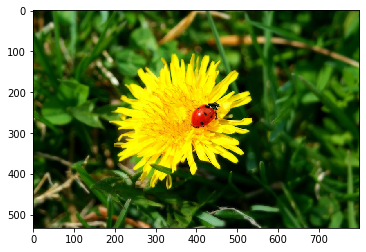

In [20]:
from matplotlib.image import imread

# matplotlib에서는 각 RGB 채널이 0~255가 아닌 0.0~1.0의 범위를 가진다.
image = imread("./images/ladybug.png")

plt.imshow(image)
plt.show()

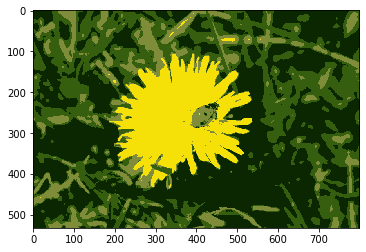

In [21]:
X = image.reshape(-1, 3)

# 4개 색상으로 clustering
kmeans = KMeans(n_clusters=4).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img)
plt.show()

## 군집을 사용한 전처리

지도 학습 알고리즘 적용 전에 전처리 단계로 차원 축소에 군집을 사용하면 효과적이다.

다음은 MNIST와 비슷한 숫자 데이터셋에 이를 적용하는 예이다.

In [22]:
# 데이터셋 불러오기

from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [23]:
# train, test 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [24]:
# logistic regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

print(log_reg.score(X_test, y_test))

0.9688888888888889


위의 결과에서, 약 96.9%의 정확도를 보이는 것을 알 수 있다.

이제 전처리를 통해 성능이 향상되는지 살펴보자.

먼저, k-평균으로 50개의 클러스터를 모으고, 이미지를 50개 클러스터까지의 거리로 바꾼다. 그리고 `LogisticRegression`을 학습한다.

In [25]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_test, y_test))

0.98


위의 결과를 통해 성능이 향상된 것을 알 수 있다.

클러스터 개수 k를 임의로 설정하는 것보다 좋은 k값을 찾는 과정도 파이프라인에 추가하여 수행한다면 더욱 좋은 결과를 가져올 수 있다.

여기서는 실루엣 분석이 아니라 cross validation에서 좋은 분류 성능을 내는 k값을 찾아야 한다. 이는 `GridSearchCV`를 사용하면 수행할 수 있다.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   1.9s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.0s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.1s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.1s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   2.7s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   3.1s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   2.8s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.8s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.9s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.8s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   2.9s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   3.2s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   3.2s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   3.2s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   3.4s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   2.6s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   3.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   3.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   3.4s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   2.8s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.4s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.3s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   2.8s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.4s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.1s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   3.3s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   3.5s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   3.1s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 12.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [27]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 57}
0.98


위의 결과에서 k=57개의 클러스터를 사용할 때, 가장 좋은 결과를 보이는 것을 알 수 있다.

## 군집을 사용한 준지도 학습

군집은 레이블이 없는 데이터가 많고, 레이블이 있는 데이터가 적을 때의 준지도 학습에도 사용할 수 있다.

먼저, 숫자 데이터셋에서 50개의 레이블된 샘플로만 `LogisticRegression`을 학습시켜보자.

In [51]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

print(log_reg.score(X_test, y_test))

0.8333333333333334


83.3%로 낮은 정확도를 보인다.

이제 군집을 사용한 준지도 학습으로 어떻게 성능을 높일 수 있는지 알아보자.

먼저 훈련 세트를 50개의 클러스터로 모은다. 그리고 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾아 확인한다. 이러한 이미지를 대표 이미지(representative image)라고 한다.

In [52]:
# 50개의 대표 이미지 출력

k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

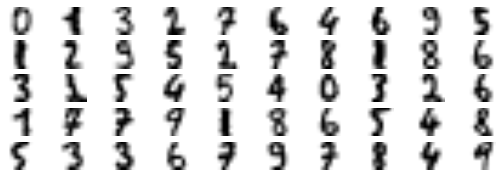

In [53]:
plt.figure(figsize=(9, 3))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
    
plt.show()

위 이미지를 보고 수동으로 레이블을 할당한다.

In [54]:
y_representative_digits=np.array([0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
                                  1, 2, 9, 5, 2, 7, 8, 2, 8, 6,
                                  3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
                                  1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
                                  5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

이제 50개의 각 클러스터별 대표하는 이미지의 레이블로 된 데이터셋을 통해 성능을 향상시켜보자.

In [55]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

print(log_reg.score(X_test, y_test))

0.9177777777777778


똑같이 50개의 데이터였지만, 성능이 83.3%에서 91.8%로 향상된 것을 알 수 있다.

샘플에 직접 레이블을 부여하는 것은 많은 시간이 들기 때문에, 위처럼 대표 샘플에 레이블을 할당하는 것이 좋은 방법이 될 수 있다.

여기서 더 나아가 이 레이블을 동일한 클러스터에 있는 모든 샘플로 전파해보자. 이를 레이블 전파(label propagation)라고 한다.

In [56]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

다시 모델을 훈련하고 성능을 테스트해보자.

In [57]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
print(log_reg.score(X_test, y_test))

0.9311111111111111


성능을 더 향상시켰지만 문제는 각 클러스터 경계에 위치한 샘플들에는 레이블이 잘못 부여되었을 수 있다는 것이다.

센트로이드와 가까운 샘플의 20%에만 레이블을 전파하고, 다시 확인해보자

In [58]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [59]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
print(log_reg.score(X_test, y_test))

0.8955555555555555


저자의 코드에서는 성능이 더 향상되었지만, 직접 돌려보니 오히려 낮아졌다.

저자의 클러스터 대표이미지와 직접 코드를 돌려본 대표이미지가 다른 것을 보아, 내가 돌린 코드에서의 클러스터가 더욱 좋지 못한 클러스터이기 때문에 센트로이드에 가까운 데이터로만 수행한 것이 더욱 좋지 못한 성능을 보인 것 같다.

일반적으로는 센트로이드에 가까운 데이터만을 사용하면, 클러스터 경계의 샘플들을 제외할 수 있으므로 성능을 향상시킬 수 있다.

다음은 전파된 레이블과 실제 데이터와의 비교를 하는 코드이다.

In [60]:
print(np.mean(y_train_partially_propagated == y_train[partially_propagated]))

0.972318339100346


약 97%정도로 실제 데이터와 매우 유사하다는 것을 알 수 있다.

### 능동 학습 (Active Learning)

어떤 데이터를 먼저 레이블링해서 알고리즘이 학습하게 할 것인지가 능동학습(Active Learning)의 핵심 질문이다. 즉, 능동 학습(active learning)은 알고리즘이 요청할 때 레이블된 데이터를 제공하는 것을 의미한다.

가장 널리 사용되는 전략 중 하나는 **불확실성 샘플링(uncertainty sampling)**이며, 다음의 과정으로 동작한다.

1. 수집된 레이블된 샘플에서 모델을 학습하고, 이를 통해 레이블되지 않은 모든 샘플에 대한 예측을 만든다.
2. 가장 불확실하게 예측한 샘플에 (전문가가) 직접 레이블을 붙인다.
3. 레이블을 부여하는 노력 만큼의 성능이 향상되지 않을 때까지 이를 반복한다.

불확실성 외에 다른 전략은 다음과 같은 것들이 있다.
- 모델을 가장 크게 바꾸는 샘플에 레이블을 요청
- 모델의 검증 점수를 가장 크게 떨어뜨리는 샘플에 레이블을 요청
- 여러 개의 모델(SVM이나 랜덤포레스트)이 동일한 예측을 내지 않는 샘플에 대해 레이블을 요청

## DBSCAN

DBSCAN(Density-based spatial clustering of applications with noise)은 국부적 밀도를 추정하는 방식을 사용한다. 밀도 기반의 클러스터링은 점이 세밀하게 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식이다. 

쉽게 설명하면, 어느 점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식이다.

작동방식은 다음과 같다.
1. 각 샘플에서 작은 거리인 $\epsilon$내에 샘플이 몇개 있는지 센다. 이 지역을 샘플의 $\epsilon$-이웃($\epsilon$-neighborhood)라고 한다.
2. 자신을 포함한 $\epsilon$-이웃 내에 적어도 `min_samples`개 샘플이 있다면, 이를 핵심 샘플(core instance)로 간주한다.
3. 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속하며, 이웃에는 다른 핵심 샘플이 포함될 수 있다. 즉, 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
4. 핵심 샘플이나 이웃이 아닌 샘플은 이상치로 판단한다.

이 알고리즘은 모든 클러스터가 충분히 밀집되어 있고, 밀집되지 않은 지역과 구분이 잘 될 경우에 좋은 성능을 낸다.

사이킷런에서는 다음과 같이 `DBSCAN`을 사용하면 된다.

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

print(dbscan.labels_)

[-1  0 -1  1  2  3  3  4  3  2  1  2  2  1  5  2  3  5  2  1  2 -1  5  3
  3  0  6  1  1  2  2  7  7  2  2  1  2  2  4  2  0  2  4  3  5  7  5  3
  5  0  2  2  8  2  7 -1  2  0  5  3  0  2  3  2  1 -1  3  2  3  2  2  2
  0  5  3  7  1  0  2  2  2  1  3  0  2  2  5  1  7  1  7  0  1  1  2  2
  2  3 -1  4  0  3 -1  2  2  3  2 -1  7  2  2  1  3  4  5  0  2  2  2  3
  2 -1  4  2  1  2  7  0  1  3  2  2  2  2  0  2  7  2  3  3  7  2  6  2
  1  3  0  3  3  4  3  3  0  3  6  6  7  1  0  3  1  2  4  2  0  2  3  0
  2 -1  7  0  3  3  2  2  3  3  2  2  2  2  2  2  3  7  6  2 -1  1  5  2
  0  7  2  0  5  0  0  2 -1  7  3  0  1  1  3  0  2  1  2  2  3  2  2  2
  2  0  3 -1  2  1  2  2  6  1  3  2  2  3  2  7  2  6  3 -1  2  0  8  6
  5  4  0  0  1  7  5  2  0  3  3  3  7  2  2  2  2  1  2  2  2 -1  2  2
  2  2  4  1  2  3 -1  0  2  7  2  2  3  0  5  2  2  2  7  4 -1  2  3  3
 -1  2  1  3  1  3  2  7  4 -1  2  1  2  2  3  1  1  1  3  3  2 -1  1  2
  2  7  1  1  4  3  2  2 -1  3  1 -1  1  2  2  5  2

위 결과에서, 일부 클러스터의 인덱스가 -1이라는 것은 이상치를 의미한다.

핵심 샘플의 인덱스는 인스턴스 변수 `core_sample_indices_`, 핵심 샘플 자체는 인스턴스 변수 `components_`에서 확인할 수 있다.

In [62]:
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_)

799
[  1   3   4   6   7   8   9  10  11  12  13  14  15  16  18  20  22  23
  24  25  26  27  28  29  31  32  33  35  36  37  38  39  40  41  42  43
  44  45  46  47  49  51  54  56  57  58  59  60  61  62  63  64  66  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  87
  88  89  90  91  92  93  94  95  96  97  99 100 103 105 106 108 109 110
 111 112 114 115 116 117 118 119 120 122 123 124 125 126 127 129 130 131
 132 133 134 135 136 137 139 141 142 143 144 145 146 147 149 151 152 154
 155 156 158 159 160 161 163 164 165 166 167 168 170 171 172 173 174 175
 176 177 178 179 181 184 185 186 187 189 190 191 192 193 194 195 196 197
 198 199 201 202 204 205 206 207 208 209 210 211 212 213 215 216 217 218
 220 221 222 223 225 226 227 228 229 232 233 234 236 237 238 240 241 244
 245 246 247 248 249 251 253 255 256 257 258 259 260 262 263 264 265 266
 267 268 269 271 272 273 274 275 276 277 278 279 280 281 282 283 285 287
 289 290 291 292 293 294 295 296 299 301 302 30

In [63]:
print(dbscan.components_)

[[ 0.04900935  0.02940087]
 [ 0.55789847  0.75678396]
 [ 1.03951743 -0.45135614]
 ...
 [ 1.14828339 -0.48599385]
 [-0.0924756   1.06606812]
 [ 0.99018334  0.32850948]]


$\epsilon$=0.2의 DBSCAN을 하나 더 만들어 그래프를 그려보면 다음과 같다.

In [64]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [65]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

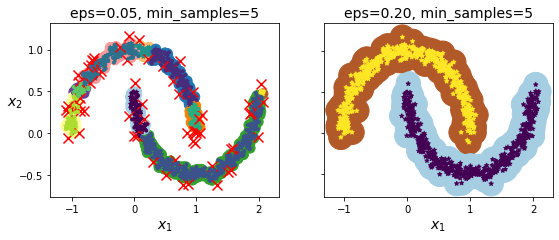

In [66]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

$\epsilon=0.2$인 모델이 더욱 좋은 군집을 얻는다는 것을 알 수 있다.

`DBSCAN`은 `predict()`를 제공하지 않고, `fit_predict()`를 제공하므로 새로운 샘플에 대한 클러스터를 예측할 수 없다. 따라서, 사용자가 다른 분류 알고리즘을 사용해 예측해야 한다.

다음은 `KNeighborsClassifier`를 사용하는 방법이다.

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# 여기서는 핵심 샘플에서만 훈련하였지만, 모든 샘플에서 훈련하거나
# 이상치를 제외하고 훈련시킬 수도 있다.(최종 작업의 성능에 따라 결정)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

이제 분류기에 새로운 샘플을 주입하여 어떤 클러스터에 속할 가능성이 높은지 출력해보자.

In [68]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[1 0 1 0]
[[0.26 0.74]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]]


결정 경계는 다음과 같다.

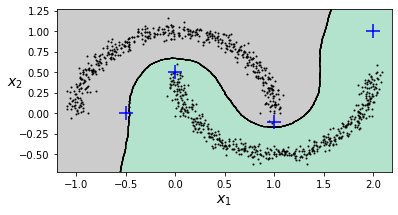

In [69]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

위 그림에서, +지점이 `X_new`에 있는 샘플 4개의 위치이다.

여기서는 훈련 세트에 이상치가 없기 때문에, 클러스터에서 멀리 떨어져 있더라도 클러스터 한개를 선택하지만, 최대 거리를 사용하면 이를 이상치로 간단히 분류할 수 잇다.

`KNeighborsClassifier`의 `kneighbors()`를 사용하면 가장 가가운 k개 이웃의 거리와 인덱스를 얻을 수 있다.

In [70]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

y_pred = dbscan.labels_[dbscan2.core_sample_indices_][y_pred_idx]

# 거리가 0.2보다 크면 이상치로 분류
y_pred[y_dist > 0.2] = -1
print(y_pred.ravel())

[-1  0 -1 -1]


DBSCAN을 요약하면 다음과 같다.

장점
- 클러스터의 모양과 개수에 상관없이 감지할 수 잇다.
- 이상치에 안정적이고 하이퍼파라미터가 2개 뿐이다.(`eps`, `min_samples`)

단점
- 클러스터간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능하다.(고차원 데이터셋에서 좋은 성능을 내지 못함)